In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
data = MNIST('./MNIST_Dataset_Loader/dataset/')

In [3]:
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

In [4]:
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [5]:
X = train_img

In [6]:
y = train_labels

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [8]:
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

SVC(gamma=0.1, kernel='poly')

In [9]:
with open('MNIST_SVM.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)


In [10]:
acc = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.9788333333333333

Predicted Values:  [8 3 0 ... 5 6 9]

Accuracy of Classifier on Validation Images:  0.9788333333333333

Confusion Matrix: 
 [[552   0   0   0   0   1   1   1   1   1]
 [  0 675   4   0   0   0   1   1   1   0]
 [  1   2 582   0   1   0   0   4   4   2]
 [  1   1   4 600   0   4   0   4   5   2]
 [  0   3   0   0 550   0   2   1   0   0]
 [  0   0   3   5   0 549   2   0   4   0]
 [  0   1   0   0   4   3 559   0   1   0]
 [  0   2   3   2   1   0   0 646   2   3]
 [  1   2   0   3   3   5   2   2 578   2]
 [  3   0   0   4   5   0   0   6   0 582]]


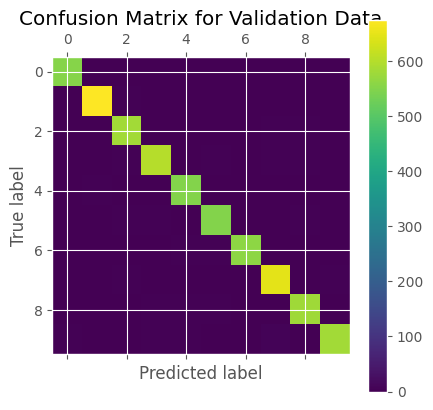

In [11]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
test_labels_pred = clf.predict(test_img)
acc = accuracy_score(test_labels,test_labels_pred)
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)
print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9782

Confusion Matrix for Test Data: 
 [[ 971    0    2    1    0    2    1    1    2    0]
 [   0 1123    2    2    0    1    3    1    3    0]
 [   7    0 1007    0    2    0    5    8    3    0]
 [   0    2    1  989    0    6    0    4    5    3]
 [   3    0    1    0  965    0    3    0    0   10]
 [   3    0    1    9    1  866    4    1    5    2]
 [   5    5    2    0    2    4  938    0    2    0]
 [   0    9    8    2    2    0    0 1001    0    6]
 [   5    0    1    4    4    3    2    5  947    3]
 [   3    6    1    4   10    3    1    3    3  975]]


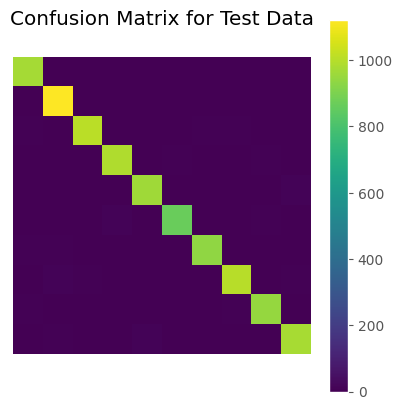

In [13]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()


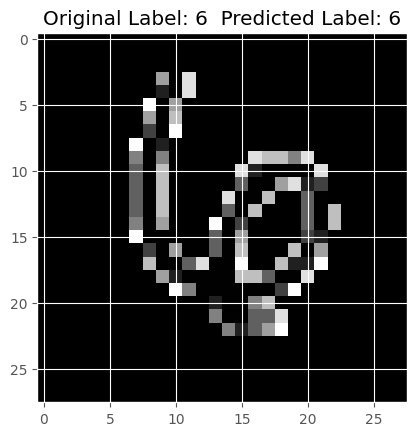

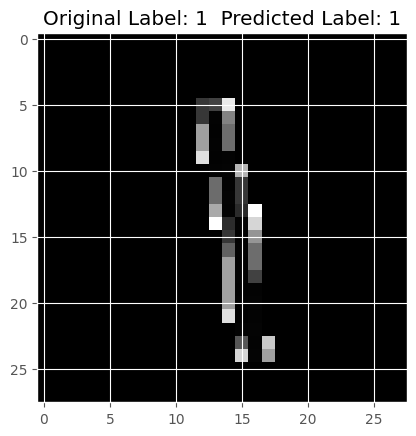

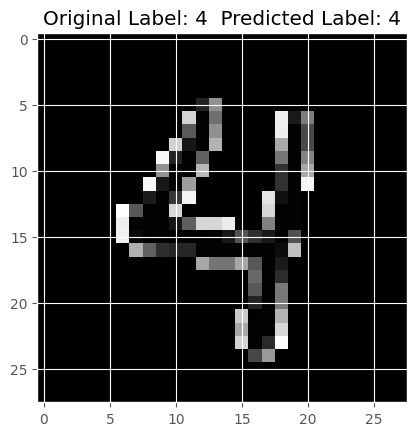

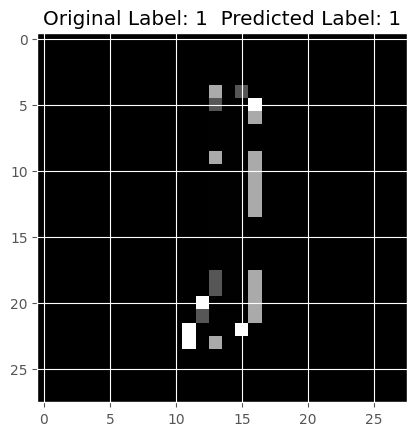

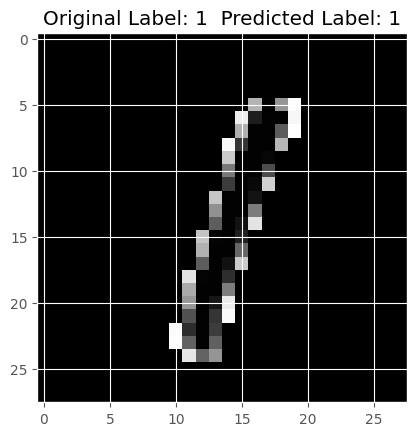

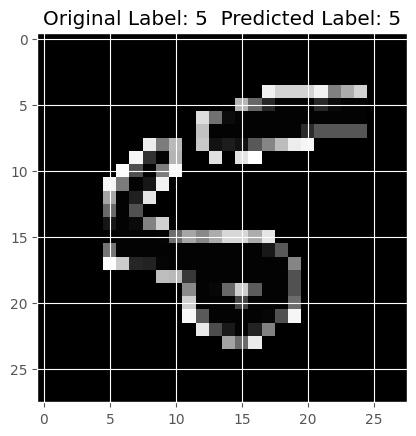

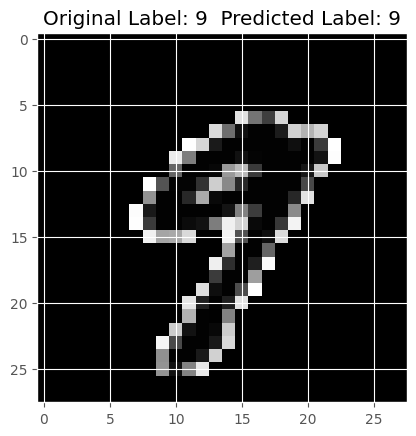

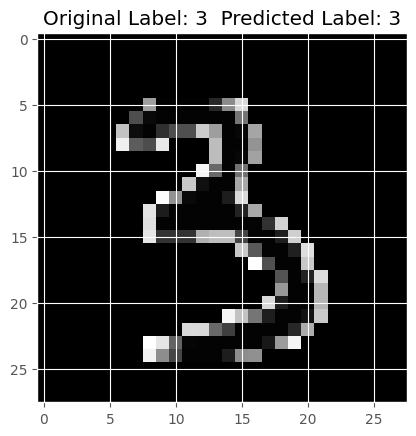

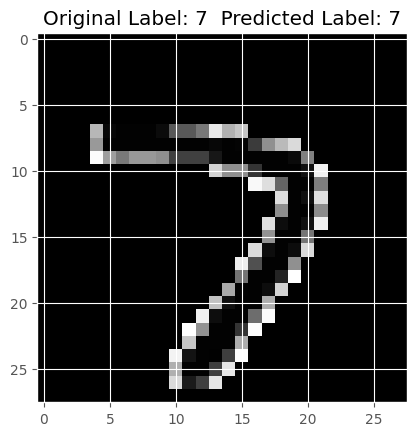

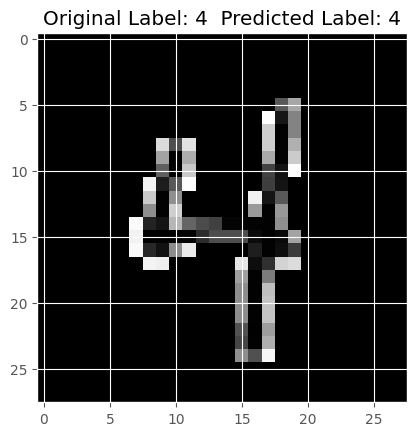

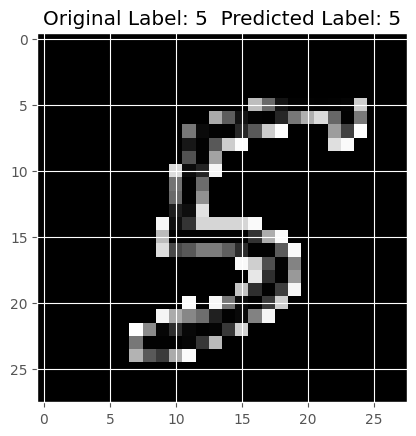

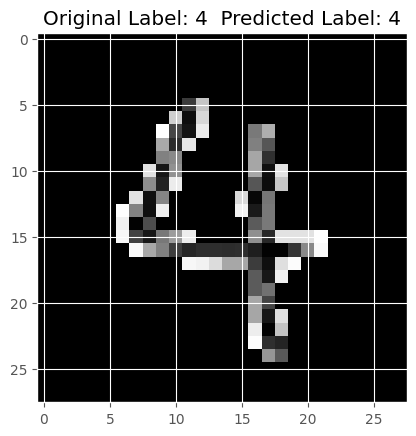

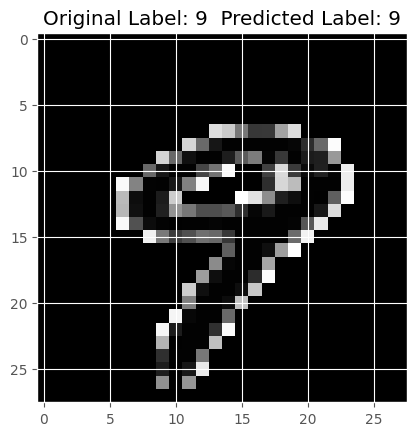

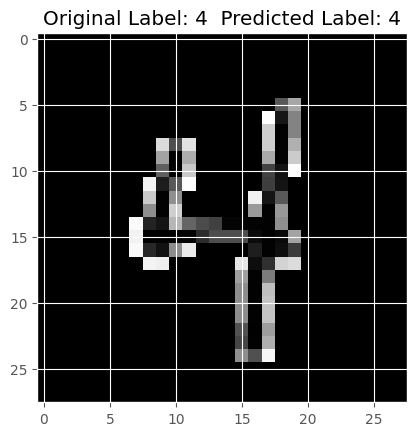

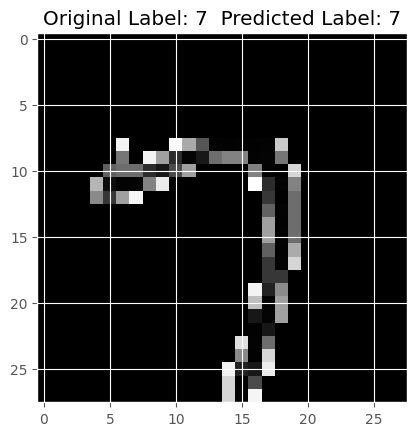

In [14]:
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()